# Using SVM and SVC with kernel RBF on MNIST Dataset 

### Given Instructions

In [1]:
# Train a linear SVM and a kernel (RBF) SVM classifier on the MNIST dataset. Since SVM classifiers are
# binary classifiers, you will need to use one-versus-all to classify all 10 digits.
# What accuracy can you reach?
# Your python program should be commented, and structured. Please place your file(.ipynb) in a
# directory named after you, zip it and submit it to canvas.
# Projects that are demonstrated successfully live during class (at the end of class, last 15 mins of lecture)
# will receive an immediate score of 100%.

# Project

In [2]:
#First we import the MNIST dataset and split into train/test
from keras.datasets import mnist

(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

## Data Visualization

In [3]:
print(xTrain.shape)
print(type(xTrain))
print(xTrain)

(60000, 28, 28)
<class 'numpy.ndarray'>
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


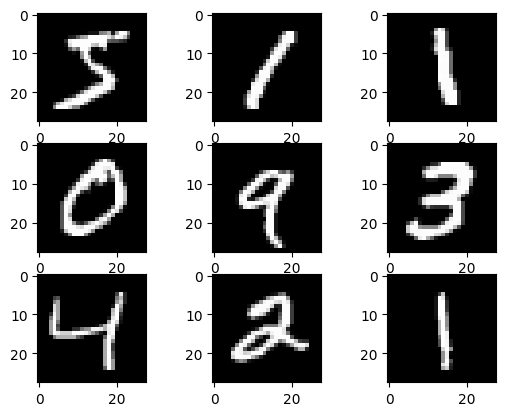

In [4]:
#Let's plot 9 images from Training Set

import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,3)

for i in range(0, 9):
    if i < 3:
        # This piece of code:
        # cmap=plt.get_cmap('gray')
        # converts the image to grayscale
        axs[i % 3, 0].imshow(xTrain[i], cmap=plt.get_cmap('gray'))
    elif i < 6:
        axs[i % 3, 1].imshow(xTrain[i], cmap=plt.get_cmap('gray'))
    else:
        axs[i % 3, 2].imshow(xTrain[i], cmap=plt.get_cmap('gray'))

plt.show()

## Linear SVM

### Data Prep => Reshaping XTrain and xTest

In [5]:
#reshape for model creation -- Linear SVM
xTrain = xTrain.reshape((len(xTrain), -1))
xTest = xTest.reshape((len(xTest), -1))

### Without Pipeline and Grid Search

In [6]:
from sklearn import svm

# `dual = False` is used when the # of samples is > the number of features
# i.e. 60,000 data samples/tuples > 28*28 features (length x width of each image)
#      60,000 > 784

linSVM = svm.LinearSVC(dual = False, max_iter = 5000)

#train model
linSVM.fit(xTrain, yTrain)

#14 minute runtime

LinearSVC(dual=False, max_iter=5000)

In [7]:
#obtain prediction
yPredLinSVM = linSVM.predict(xTest)

#Evaluation Metrics
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(yTest, yPredLinSVM))
print("Precision:", metrics.precision_score(yTest, yPredLinSVM, average = 'macro'))
print("Recall:", metrics.recall_score(yTest, yPredLinSVM, average = 'macro'))
print("F1-Score:", metrics.f1_score(yTest, yPredLinSVM, average = 'macro'))

Accuracy: 0.9168
Precision: 0.9155450022414267
Recall: 0.9156542231276058
F1-Score: 0.9154754461360797


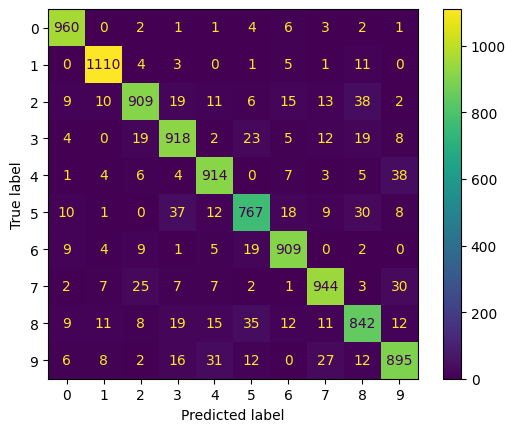

In [8]:
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cmLinSVM = confusion_matrix(yTest, yPredLinSVM, labels = linSVM.classes_)
dispLinSVM = ConfusionMatrixDisplay(confusion_matrix = cmLinSVM, display_labels = linSVM.classes_)
dispLinSVM.plot()
plt.show()

### With Pipeline and Grid Search

In [9]:
#Let's try using pipeline now:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', svm.LinearSVC(dual = False, max_iter = 5000))
])

params = {
    'classifier__C' : [10, 1, 0.1, 0.01]
}

gridSLin = GridSearchCV(pipeline, params, cv = 5, n_jobs = -1, verbose = 4)

gridSLin.fit(xTrain, yTrain)

#4 minute runtime

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classifier',
                                        LinearSVC(dual=False, max_iter=5000))]),
             n_jobs=-1, param_grid={'classifier__C': [10, 1, 0.1, 0.01]},
             verbose=4)

In [10]:
#display best C found, as well as the Model
bestCLinSVM = gridSLin.best_params_
bestModelLinSVM = gridSLin.best_estimator_

print(bestCLinSVM, bestModelLinSVM)

{'classifier__C': 0.1} Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', LinearSVC(C=0.1, dual=False, max_iter=5000))])


In [11]:
#predict against test set
newYPredLinSVM = bestModelLinSVM.predict(xTest)

print("Accuracy:", metrics.accuracy_score(yTest, newYPredLinSVM))
print("Precision:", metrics.precision_score(yTest, newYPredLinSVM, average = 'macro'))
print("Recall:", metrics.recall_score(yTest, newYPredLinSVM, average = 'macro'))
print("F1-Score:", metrics.f1_score(yTest, newYPredLinSVM, average = 'macro'))

#Notice that this new model yields higher evalution metric values

Accuracy: 0.9182
Precision: 0.917072335740215
Recall: 0.9169961664788884
F1-Score: 0.9168883105285737


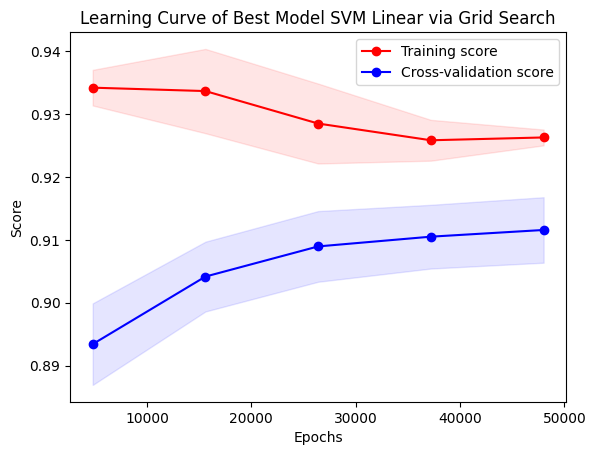

In [12]:
#plot for over/underfitting
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

#obtain vals for plotting
trainSizes, trainScores, testScores = learning_curve(bestModelLinSVM, xTrain, yTrain, cv = 5, n_jobs = -1)

#calculate Mean and Std for plotting on both train and test scores
trainMean = np.mean(trainScores, axis=1)
trainStd = np.std(trainScores, axis=1)
testMean = np.mean(testScores, axis=1)
testStd = np.std(testScores, axis=1)

#plot the avg (line + points) and std (shaded regions around lines)

#labels
plt.figure()
plt.title("Learning Curve of Best Model SVM Linear via Grid Search")
plt.xlabel("Epochs")
plt.ylabel("Score")

#shaded regions             alpha   => transparency of the fill
plt.fill_between(trainSizes, trainMean - trainStd, trainMean + trainStd, alpha = 0.1, color = "r")
plt.fill_between(trainSizes, testMean - testStd, testMean + testStd, alpha = 0.1, color = "b")

#lines                      o-      => (o => points/dots, - => should connect the points)
plt.plot(trainSizes, trainMean, 'o-', color = "r", label = "Training score")
plt.plot(trainSizes, testMean, 'o-', color = "b", label = "Cross-validation score")
plt.legend(loc = "best")
plt.show()

#The model seems to be doing just fine
#No visible over/underfitting. They converge to around 0.92 ~ 92% acc

#23 minute runtime

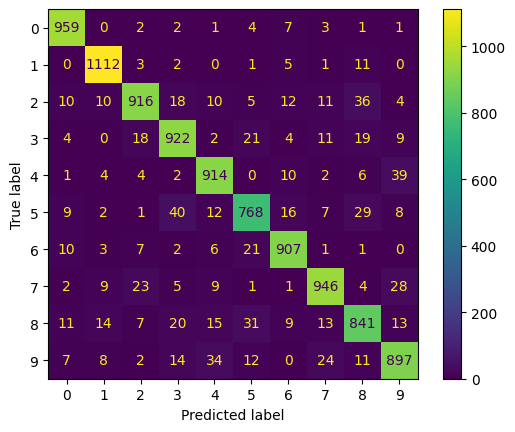

In [13]:
#Confusion Matrix display:

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cmBestLinSVM = confusion_matrix(yTest, newYPredLinSVM, labels = bestModelLinSVM.classes_)
dispBestLinSVM = ConfusionMatrixDisplay(confusion_matrix = cmBestLinSVM, display_labels = bestModelLinSVM.classes_)
dispBestLinSVM.plot()
plt.show()

## Kernel RBF for Entire Dataset

### Data Prep => Reload xTrain, yTrain, xTest, yTest, and Reshaping xTrain, xTest

In [14]:
#reload the xTrain/test and yTrain/test for using RBF Kernel
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

#reshape for model creation
xTrain = xTrain.reshape((len(xTrain), -1))
xTest = xTest.reshape((len(xTest), -1))

### Without Pipeline and GridSearch

In [15]:
RBFModelAllData = svm.SVC(kernel = 'rbf', max_iter = 5000)

RBFModelAllData.fit(xTrain, yTrain)

#2 minute runtime

SVC(max_iter=5000)

In [16]:
#test model and obtain prediction as `y_pred`
yPredRBFModelAllData = RBFModelAllData.predict(xTest)

#Evaluation Metrics

print("Accuracy:", metrics.accuracy_score(yTest, yPredRBFModelAllData))
print("Precision:", metrics.precision_score(yTest, yPredRBFModelAllData, average = 'macro'))
print("Recall:", metrics.recall_score(yTest, yPredRBFModelAllData, average = 'macro'))
print("F1-Score:", metrics.f1_score(yTest, yPredRBFModelAllData, average = 'macro'))

#1 minute runtime

Accuracy: 0.9792
Precision: 0.9791973966593345
Recall: 0.9790919842945065
F1-Score: 0.9791298259748042


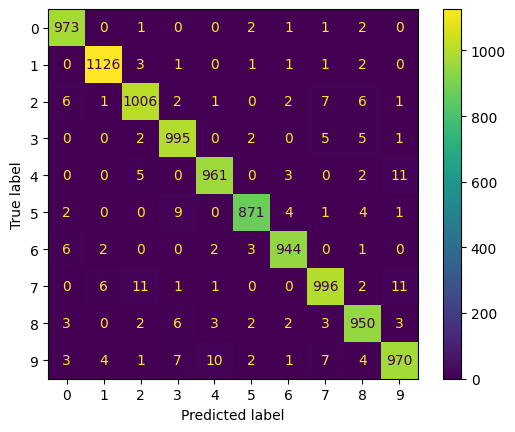

In [17]:
#Confusion Matrix display:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cmRBF = confusion_matrix(yTest, yPredRBFModelAllData, labels = RBFModelAllData.classes_)
dispRBF = ConfusionMatrixDisplay(confusion_matrix = cmRBF, display_labels = RBFModelAllData.classes_)
dispRBF.plot()
plt.show()

### With Pipeline and GridSearch

In [15]:
#create pipeline and `C` values to use in GridSearch
from sklearn.model_selection import KFold

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', svm.SVC(kernel = 'rbf', cache_size = 2000, gamma = 0.1, max_iter = 5000))
])

params = {
    'classifier__C' : [10, 5],
}

#split into K-Fold with 10,000 data pts for each fold (6 folds)
kf = KFold(n_splits = 6, shuffle = True)

#Note: Looking at the documentation, verbose doesn't perform as expected:
# Only looks at verbose > 0: https://github.com/scikit-learn/scikit-learn/blob/093e0cf14/sklearn/model_selection/_search.py#L837
# Says there are different messages based on verbose > 1, > 2, > 3: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#insert all the above into the gridSearch
gridSRBF = GridSearchCV(pipeline, params, cv = kf, n_jobs = -1, verbose = 4)

gridSRBF.fit(xTrain, yTrain)

#113 minute runtime

Fitting 6 folds for each of 2 candidates, totalling 12 fits


c:\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classifier',
                                        SVC(cache_size=2000, gamma=0.1,
                                            max_iter=5000))]),
             n_jobs=-1, param_grid={'classifier__C': [10, 5]}, verbose=4)

In [16]:
#display best C found, as well as the Model
bestCRBF = gridSRBF.best_params_
bestModelRBFAllData = gridSRBF.best_estimator_

print(bestCRBF, bestModelRBFAllData)

{'classifier__C': 10} Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=10, cache_size=2000, gamma=0.1, max_iter=5000))])


In [17]:
#predict against test set
newYPredRBFAllData = bestModelRBFAllData.predict(xTest)

print("Accuracy:", metrics.accuracy_score(yTest, newYPredRBFAllData))
print("Precision:", metrics.precision_score(yTest, newYPredRBFAllData, average = 'macro'))
print("Recall:", metrics.recall_score(yTest, newYPredRBFAllData, average = 'macro'))
print("F1-Score:", metrics.f1_score(yTest, newYPredRBFAllData, average = 'macro'))

#Notice that this new model yields higher evalution metric values

#3 min runtime

Accuracy: 0.9576
Precision: 0.9634399455523018
Recall: 0.957060835242728
F1-Score: 0.9588057358326783


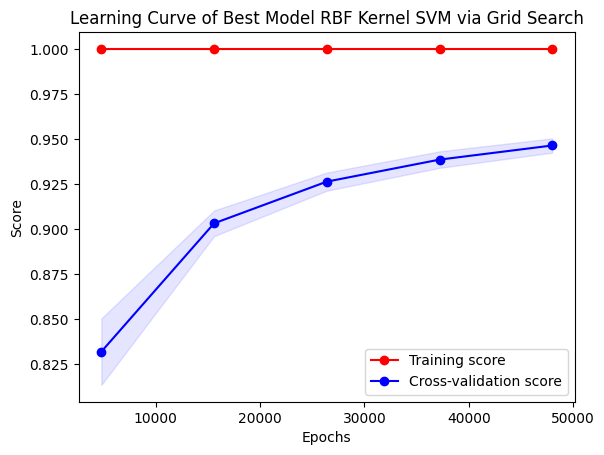

In [18]:
#plot for over/underfitting

#obtain vals for plotting
trainSizes, trainScores, testScores = learning_curve(bestModelRBFAllData, xTrain, yTrain, cv = 5, n_jobs = -1)

#calculate Mean and Std for plotting on both train and test scores
trainMean = np.mean(trainScores, axis=1)
trainStd = np.std(trainScores, axis=1)
testMean = np.mean(testScores, axis=1)
testStd = np.std(testScores, axis=1)

#plot the avg (line + points) and std (shaded regions around lines)

#labels
plt.figure()
plt.title("Learning Curve of Best Model RBF Kernel SVM via Grid Search")
plt.xlabel("Epochs")
plt.ylabel("Score")

#shaded regions
plt.fill_between(trainSizes, trainMean - trainStd, trainMean + trainStd, alpha = 0.1, color = "r")
plt.fill_between(trainSizes, testMean - testStd, testMean + testStd, alpha = 0.1, color = "b")

#lines
plt.plot(trainSizes, trainMean, 'o-', color = "r", label = "Training score")
plt.plot(trainSizes, testMean, 'o-', color = "b", label = "Cross-validation score")
plt.legend(loc = "best")
plt.show()

#Seems to be overfitting, so I've made changes to gamma, cache size, and C to reduce overfitting

#140 minute runtime

In [19]:
from sklearn.model_selection import cross_val_score, KFold

#10,000 data points per fold

kF = KFold(n_splits = 6, shuffle = True)

scores = cross_val_score(bestModelRBFAllData, xTrain, yTrain, cv = kF, scoring = 'accuracy', n_jobs = -1)

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

#47 minute runtime

Cross-Validation Scores: [0.9507 0.9524 0.9547 0.9525 0.9426 0.9504]
Mean Accuracy: 0.9505500000000001


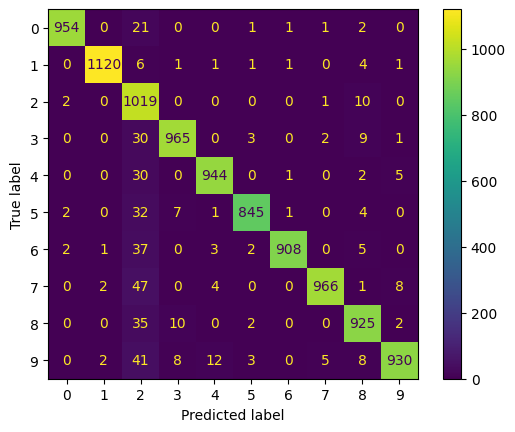

In [20]:
#Confusion Matrix display:

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cmBestRBFAllData = confusion_matrix(yTest, newYPredRBFAllData, labels = newYPredRBFAllData.classes_)
dispBestRBFAllData = ConfusionMatrixDisplay(confusion_matrix = cmBestRBFAllData, display_labels = newYPredRBFAllData.classes_)
dispBestRBFAllData.plot()
plt.show()

## Kernel RBF for only 10,000 data pts.

### Data Prep => Obtaining subset of only 10,000 data pts.
#### This includes Reloading xTrain, yTrain, xTest, yTest and Reshaping xTrain, xTest

In [18]:
#reload the xTrain/test and yTrain/test for RBF kernel
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

#subset each for the first 10,000 data points (they should all match)
xTrainSubset = xTrain[0:10000]
xTestSubset = xTest[0:10000]
yTrainSubset = yTrain[0:10000]
yTestSubset = yTest[0:10000]

#reshape for model creation
xTrainSubset = xTrainSubset.reshape((len(xTrainSubset), -1))
xTestSubset = xTestSubset.reshape((len(xTestSubset), -1))

In [19]:
#Verification via printing
print(len(xTrainSubset))
print(xTrainSubset)

10000
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Without Pipeline and GridSearch 10k data pts.

In [20]:
RBFModel10k = svm.SVC(kernel = 'rbf', max_iter = 5000)

RBFModel10k.fit(xTrainSubset, yTrainSubset)

#10 second runtime

SVC(max_iter=5000)

In [21]:
#test model and obtain prediction as `y_pred`
yPredRBFModel10k = RBFModel10k.predict(xTestSubset)

#Evaluation Metrics

print("Accuracy:", metrics.accuracy_score(yTestSubset, yPredRBFModel10k))
print("Precision:", metrics.precision_score(yTestSubset, yPredRBFModel10k, average = 'macro'))
print("Recall:", metrics.recall_score(yTestSubset, yPredRBFModel10k, average = 'macro'))
print("F1-Score:", metrics.f1_score(yTestSubset, yPredRBFModel10k, average = 'macro'))

#20 second runtime

Accuracy: 0.9594
Precision: 0.9593546447971855
Recall: 0.9590100865954783
F1-Score: 0.959091718039289


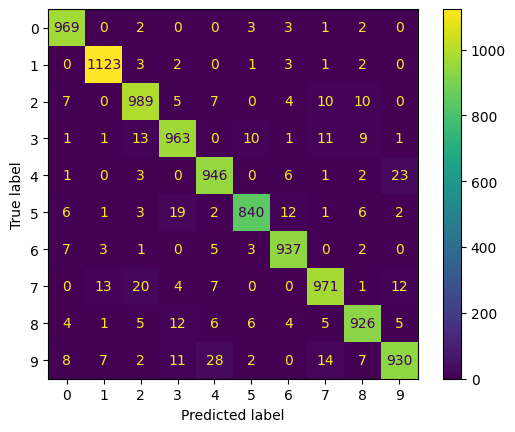

In [22]:
#Confusion Matrix display:

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cmRBF10k = confusion_matrix(yTestSubset, yPredRBFModel10k, labels = RBFModel10k.classes_)
dispRBF10k = ConfusionMatrixDisplay(confusion_matrix = cmRBF10k, display_labels = RBFModel10k.classes_)
dispRBF10k.plot()
plt.show()

### With Pipeline and GridSearch 10k data pts.

In [23]:
#create pipeline, gamma, and `C` values to use in GridSearch
from sklearn.model_selection import KFold

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', svm.SVC(kernel = 'rbf', cache_size = 2000, max_iter = 5000))
])

params = {
    'classifier__C': [10, 1, 0.1, 0.01],
    'classifier__gamma': [10, 1, 0.1, 0.01]
}

#insert all the above into the gridSearch
gridSRBF10k = GridSearchCV(pipeline, params, n_jobs = -1, verbose = 4)

gridSRBF10k.fit(xTrainSubset, yTrainSubset)

#26 minute runtime

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classifier',
                                        SVC(cache_size=2000, max_iter=5000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [10, 1, 0.1, 0.01],
                         'classifier__gamma': [10, 1, 0.1, 0.01]},
             verbose=4)

In [24]:
#display best C & gamma found, as well as the Model
bestCGRBF10k = gridSRBF10k.best_params_
bestModelRBF10k = gridSRBF10k.best_estimator_

print(bestCGRBF10k, bestModelRBF10k)

{'classifier__C': 10, 'classifier__gamma': 0.01} Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=10, cache_size=2000, gamma=0.01, max_iter=5000))])


In [25]:
#find y_pred and predict against test set
newYPredRBF10k = bestModelRBF10k.predict(xTestSubset)

print("Accuracy:", metrics.accuracy_score(yTestSubset, newYPredRBF10k))
print("Precision:", metrics.precision_score(yTestSubset, newYPredRBF10k, average = 'macro'))
print("Recall:", metrics.recall_score(yTestSubset, newYPredRBF10k, average = 'macro'))
print("F1-Score:", metrics.f1_score(yTestSubset, newYPredRBF10k, average = 'macro'))

#Notice that this new model yields higher evalution metric values

#15 second runtime

Accuracy: 0.9645
Precision: 0.9643679059137851
Recall: 0.9640778882567872
F1-Score: 0.9641662222198419


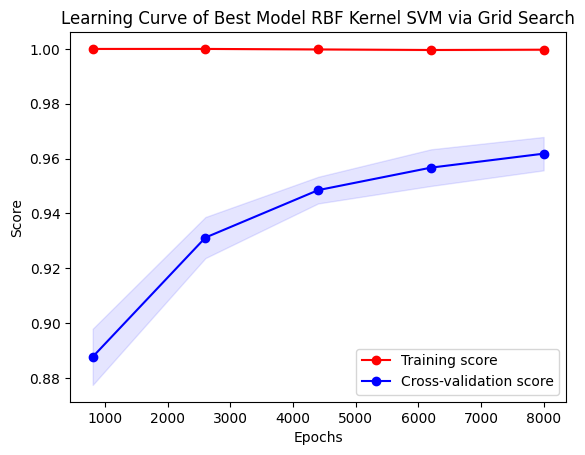

In [55]:
#plot for over/underfitting

#obtain vals for plotting
trainSizes, trainScores, testScores = learning_curve(bestModelRBF10k, xTrainSubset, yTrainSubset, cv = 5, n_jobs = -1)

#calculate Mean and Std for plotting on both train and test scores
trainMean = np.mean(trainScores, axis=1)
trainStd = np.std(trainScores, axis=1)
testMean = np.mean(testScores, axis=1)
testStd = np.std(testScores, axis=1)

#plot the avg (line + points) and std (shaded regions around lines)

#labels
plt.figure()
plt.title("Learning Curve of Best Model RBF Kernel SVM via Grid Search")
plt.xlabel("Epochs")
plt.ylabel("Score")

#shaded regions
plt.fill_between(trainSizes, trainMean - trainStd, trainMean + trainStd, alpha=0.1, color="r")
plt.fill_between(trainSizes, testMean - testStd, testMean + testStd, alpha=0.1, color="b")

#lines
plt.plot(trainSizes, trainMean, 'o-', color = "r", label = "Training score")
plt.plot(trainSizes, testMean, 'o-', color = "b", label = "Cross-validation score")
plt.legend(loc = "best")
plt.show()

#Seems to be overfitting, so I've made changes to gamma, cache size, and C to reduce overfitting

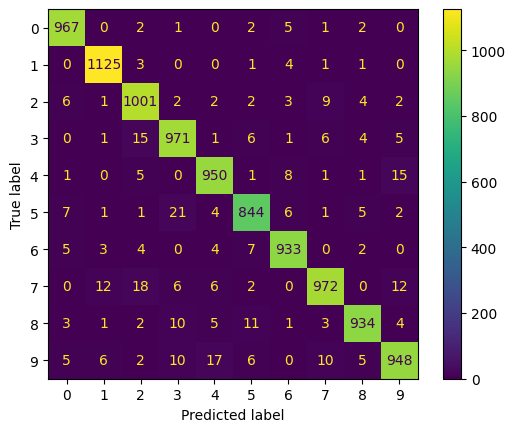

In [58]:
#Confusion Matrix display:

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cmBestRBF10k = confusion_matrix(yTestSubset, newYPredRBF10k, labels = bestModelRBF10k.classes_)
dispBestRBF10k = ConfusionMatrixDisplay(confusion_matrix = cmBestRBF10k, display_labels = bestModelRBF10k.classes_)
dispBestRBF10k.plot()
plt.show()